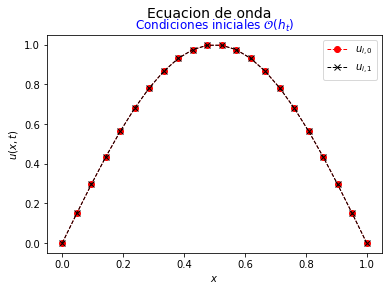

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

L = 1
N = 20
Tmax = 1.0
ht = 0.05
alpha = 2
h = L / (N+2)
Nt = int(Tmax / ht)
lamb = alpha * ht / h
if lamb>1:
    lamb=1
Tmax = Nt * ht

def f(x):
    """
    Funcion a evaluar
    """
    return np.sin(np.pi * x)

def g(x):
    """
    Velocidad inicial = 0
    """
    return 0

def solExacta(x, t):
    """
    Solucion analitica de este ejemplo
    """
    return np.sin(np.pi * x) * np.cos(2 * np.pi * t)

def calcError(sol_n, sol_e):
    """
    Funcion que calcula el error entre ambas soluciones, teorica y aproximada
    """
    return np.abs(sol_n - sol_e)

def condicionesIniciales(l, ht, u, x, op =1):
    """
    Definicion de los parametros del problema
    """
    N = len(u)
    w = np.zeros(N)
    for i in range(1,N-1):
        if op == 1:
            w[i] = u[i] + ht * g(x[i])
        else :
            w[i] = (1 - l**2) * u[i] + 0.5 * l**2 * (u[i+1] + u[i -1]) + ht * g(x[i])
    return w

x = np.linspace(0,L,N+2) # Coordenadas de la malla
u = f(x) # Condicion inicial
w = condicionesIniciales(lamb,ht ,u ,x ,op =1) # Euler : op = 1

plt.suptitle('Ecuacion de onda', fontsize =14)
plt.plot(x, u,'ro--', lw = 1, label = '$u_{i,0}$')
plt.plot(x, w,'kx--', lw = 1, label = '$u_{i,1}$')
plt.title('Condiciones iniciales $\mathcal{O}(h_t)$', color ='blue', fontsize =12)
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.legend(loc='upper right', ncol=1, framealpha= 0.75, fancybox = True, fontsize = 10)
plt.grid(color='w')
plt.subplots_adjust( hspace = 0.35 )
plt.savefig('condicion_O3.pdf')
plt.show()

def solver(u, w, N, x, Nt, l, ts):
    """
    Funcion que calcula la solucion numerica
    """
    s = np.zeros(N+2)
    for n in range(1,Nt):
        for i in range (1,N+1):
            s[i] = 2 * (1 - l **2) * w[i] + l**2 * (w[i +1] + w[i -1]) - u[i]
        solex=solExacta(x,ts[n])
        u = w.copy()
        w = s.copy()
        if n==1:
            plt.plot(x,solex,'tab:grey',label='EXACTA')
            plt.plot(x,s,'ko',label='NUMERICA')
        plt.plot(x,solex,'tab:grey')
        plt.plot(x,s,'bv')
    return s

x_ = np.linspace(0,L,N+1)
w = condicionesIniciales(lamb, ht, u, x, op = 2) # Euler : op = 1

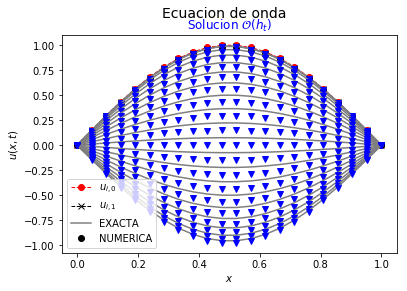

In [6]:
ts=np.linspace(0,(Tmax/2),(N+2))
plt.plot(x, u,'ro--', lw = 1, label = "$u_{i,0}$")
plt.plot(x, w,'kx--', lw = 1, label = "$u_{i,1}$")
plt.suptitle('Ecuacion de onda', fontsize =14)
plt.title('Solucion $\mathcal{O}(h_t)$', color='blue', fontsize =12)
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
w = condicionesIniciales(lamb , ht, u, x, op = 1) # Euler :op = 1
s = solver(u, w, N, x, Nt, lamb,ts)
plt.legend()
plt.savefig('condicionc_O1.pdf')
plt.show()

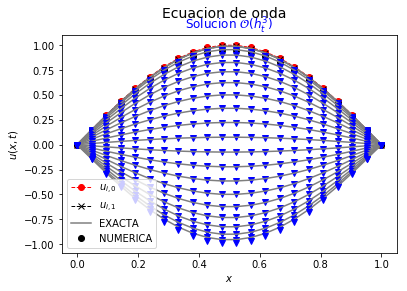

In [5]:
plt.plot(x, u,'ro--', lw = 1, label = "$u_{i,0}$")
plt.plot(x, w,'kx--', lw = 1, label = "$u_{i,1}$")
plt.suptitle('Ecuacion de onda', fontsize =14)
plt.title('Solucion $\mathcal{O}(h_t^3)$', color='blue', fontsize =12)
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
w = condicionesIniciales(lamb , ht, u, x, op = 2) # Euler :op = 1
s = solver(u, w, N, x, Nt, lamb,ts)
plt.legend()
plt.savefig('condicionc_O3.pdf')
plt.show()